In [123]:
import pandas as pd
from collections import Counter
from itertools import chain
import pm4py

In [124]:
df_verslagen = pd.read_csv('event_log_test.csv')
df_verslagen.head()

,pseudo_id,date,event_tag,verslagen_report_tags,verslagen_report_start_date,topic_tags
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2020-11-26 15:06:00,Oraal_Stuk__Tablet_Oraal__Tablet_Oraal_Stuk__K...,Klinische Brief,2020-11-26 15:06:00,['Topic 10']
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2020-11-26 09:53:00,Rectaal_Bloedverlie__Aanvullen_Onderzoek__Over...,"Consult, Kliniek: vervolgconsult",2020-11-26 09:53:00,['Topic 15']
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2020-11-25 14:13:00,Outlier,Poliklinische Brief,2020-11-25 14:13:00,['Topic -1']
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2020-11-25 13:48:00,Outlier,Poliklinische Brief,2020-11-25 13:48:00,['Topic -1']
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2020-11-25 08:47:00,Rectaal_Bloedverlie__Aanvullen_Onderzoek__Over...,"Consult, Kliniek: vervolgconsult",2020-11-25 08:47:00,['Topic 15']


In [125]:
unique_tags_df_verslagen = df_verslagen['verslagen_report_tags'].unique()

print("Unique tags in df_verslagen:")
print(unique_tags_df_verslagen)

Unique tags in df_verslagen:
['Klinische Brief' 'Consult, Kliniek: vervolgconsult'
 'Poliklinische Brief' 'Spoedeisende Hulp' 'Consult, SEH' 'Consult'
 'Consult, Kliniek: eerste consult' 'Consult, Polikliniek: vervolgconsult'
 'Consult, Polikliniek: eerste consult' 'Consult, Overige aantekeningen'
 'Consult, Telefonisch consult' 'Radiologieverslag, ECG'
 'Consult, Thuisbehandeling' 'Consult, Multidisciplinair overleg'
 'Algemeen' 'Consult, Dagbehandeling' 'Consult, Intercollegiaal consult'
 'Consult, Research' 'Consult, Samenvatting'
 'Radiologieverslag, ECG kliniek' 'Radiologieverslag, Heup links'
 'Radiologieverslag, CT colonografie']


In [126]:
unique_tags_df_verslagen = df_verslagen['event_tag'].unique()

print("Unique tags in df_verslagen:")
print(unique_tags_df_verslagen)

Unique tags in df_verslagen:
['Oraal_Stuk__Tablet_Oraal__Tablet_Oraal_Stuk__Kenmerk_Patientid__Kenmerk_Patientid_Betreffen__Patientid_Betreffen__Geb_Birthdate__Geacht_Collega__Initials_Geb_Birthdate__Initials_Geb'
 'Rectaal_Bloedverlie__Aanvullen_Onderzoek__Overig_Actie__Hb_Controle__Ferriprief_Anemie__Lichamelijk_Onderzoek__Bloedverlie_Anum__Hd_Stabiel__Beloop_Vpk__Hemoglobine_Mmoll'
 'Outlier'
 'Indicatie_Aanvraag__Asa_Klasse__Antibiotisch_Profylaxe__Profylaxe_Nvt__Antibiotisch_Profylaxe_Nvt__Cumarinederivaat_Nvt__Aanvrager_Mdlarts__Poliklinisch_Mdlverpleegkundig__Let_Poliklinisch__Let_Poliklinisch_Mdlverpleegkundig'
 'Medisch_Dossier__Naam_Functie__Dossier_Vk_Sputovamo__Dossier_Vk__Medisch_Dossier_Vk__Vk_Sputovamo_Leeftijd__Vk_Sputovamo__Registratie_Seh__Dienstdoend_Specialist__Dienstdoend_Specialist_Objectgegeven'
 'Triage_Nee__Toediening_Medicatie__Nee_Triage_Nee__Nee_Triage__Triage_Nee_Triage__Verslaglegging_Verantwoordelijk__Verantwoordelijk_Verpleegkundig__Verslaglegging_Verant

In [127]:
topic_labels = {
    "['Topic 0']": "Diabetes_&_Lunch",
    "['Topic 1']": "Breast_Cancer",
    "['Topic 2']": "CLL_&_COPD",
    "['Topic 3']": "Dialysis_&_Kidney_Function",
    "['Topic 4']": "Prophylaxis_&_ASA_Class",
    "['Topic 5']": "Diabetes_Type_II",
    "['Topic 6']": "Atrial_Fibrillation_&_Malaise",
    "['Topic 7']": "Remicade_&_Follow-up",
    "['Topic 8']": "Pancreatitis_&_Whipple",
    "['Topic 9']": "GI_Ulcer_&_Bleeding",
    "['Topic 10']": "Patient_ID_&_Medication",
    "['Topic 11']": "Medical_Records",
    "['Topic 12']": "Triage_&_Medication",
    "['Topic 13']": "Liver_Cirrhosis_&_Varices",
    "['Topic 14']": "Consultation_Registration",
    "['Topic 15']": "Rectal_Bleeding_&_Anemia",

    "['Topic -1']": "Outlier",
}

df_verslagen["new_topic_label"] = df_verslagen["topic_tags"].map(topic_labels)
df_verslagen.head()


,pseudo_id,date,event_tag,verslagen_report_tags,verslagen_report_start_date,topic_tags,new_topic_label
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2020-11-26 15:06:00,Oraal_Stuk__Tablet_Oraal__Tablet_Oraal_Stuk__K...,Klinische Brief,2020-11-26 15:06:00,['Topic 10'],Patient_ID_&_Medication
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2020-11-26 09:53:00,Rectaal_Bloedverlie__Aanvullen_Onderzoek__Over...,"Consult, Kliniek: vervolgconsult",2020-11-26 09:53:00,['Topic 15'],Rectal_Bleeding_&_Anemia
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2020-11-25 14:13:00,Outlier,Poliklinische Brief,2020-11-25 14:13:00,['Topic -1'],Outlier
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2020-11-25 13:48:00,Outlier,Poliklinische Brief,2020-11-25 13:48:00,['Topic -1'],Outlier
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2020-11-25 08:47:00,Rectaal_Bloedverlie__Aanvullen_Onderzoek__Over...,"Consult, Kliniek: vervolgconsult",2020-11-25 08:47:00,['Topic 15'],Rectal_Bleeding_&_Anemia


In [128]:
# Convert DataFrame to PM4Py event log

activity_key = 'new_topic_label'

# event_log = pm4py.format_dataframe(df_verslagen, case_id='pseudo_id', activity_key='event_tag', timestamp_key='verslagen_report_start_date')
event_log = pm4py.format_dataframe(df_verslagen, case_id='pseudo_id', activity_key=activity_key, timestamp_key='verslagen_report_start_date')

print(event_log.head())  # Verify format
event_log.head()

                                  pseudo_id                 date  \
0  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6  2013-10-21 10:24:00   
1  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6  2013-10-21 10:40:00   
2  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6  2013-10-21 10:41:00   
3  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6  2013-10-21 10:50:00   
4  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6  2013-10-22 19:59:00   

                                           event_tag verslagen_report_tags  \
0  Triage_Nee__Toediening_Medicatie__Nee_Triage_N...          Consult, SEH   
1                                            Outlier          Consult, SEH   
2                                            Outlier          Consult, SEH   
3  Medisch_Dossier__Naam_Functie__Dossier_Vk_Sput...          Consult, SEH   
4  Triage_Nee__Toediening_Medicatie__Nee_Triage_N...          Consult, SEH   

  verslagen_report_start_date    topic_tags      new_topic_label  \
0         2013-10-21 10:24:00  ['Topic 12']  Triage_&_

,pseudo_id,date,event_tag,verslagen_report_tags,verslagen_report_start_date,topic_tags,new_topic_label,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:24:00,Triage_Nee__Toediening_Medicatie__Nee_Triage_N...,"Consult, SEH",2013-10-21 10:24:00,['Topic 12'],Triage_&_Medication,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Triage_&_Medication,2013-10-21 10:24:00,0,0
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:40:00,Outlier,"Consult, SEH",2013-10-21 10:40:00,['Topic -1'],Outlier,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Outlier,2013-10-21 10:40:00,1,0
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:41:00,Outlier,"Consult, SEH",2013-10-21 10:41:00,['Topic -1'],Outlier,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Outlier,2013-10-21 10:41:00,2,0
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:50:00,Medisch_Dossier__Naam_Functie__Dossier_Vk_Sput...,"Consult, SEH",2013-10-21 10:50:00,['Topic 11'],Medical_Records,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Medical_Records,2013-10-21 10:50:00,3,0
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-22 19:59:00,Triage_Nee__Toediening_Medicatie__Nee_Triage_N...,"Consult, SEH",2013-10-22 19:59:00,['Topic 12'],Triage_&_Medication,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Triage_&_Medication,2013-10-22 19:59:00,4,0


In [129]:
# Step 1: Sort by Patient_ID and Timestamp
df_verslagen = df_verslagen.sort_values(by=['pseudo_id', 'verslagen_report_start_date'])

# Step 2: Create a list of sequences for each patient
patient_sequences = df_verslagen.groupby('pseudo_id')[activity_key].apply(lambda x: '->'.join(x))

# Step 3: Count the occurrences of each unique sequence
sequence_counts = Counter(patient_sequences)

# Step 4: Convert to DataFrame for better visualization
sequence_df = pd.DataFrame(sequence_counts.items(), columns=['Sequence', 'Count'])

# Step 5: Sort by most frequent sequences
sequence_df = sequence_df.sort_values(by='Count', ascending=False)

print(sequence_df)

                                              Sequence  Count
0    Triage_&_Medication->Outlier->Outlier->Medical...      1
53   Remicade_&_Follow-up->Patient_ID_&_Medication-...      1
77   Triage_&_Medication->Patient_ID_&_Medication->...      1
76   Outlier->Remicade_&_Follow-up->Prophylaxis_&_A...      1
75   Triage_&_Medication->Triage_&_Medication->Medi...      1
..                                                 ...    ...
32   Outlier->Triage_&_Medication->Medical_Records-...      1
31   Remicade_&_Follow-up->Triage_&_Medication->Med...      1
30   Rectal_Bleeding_&_Anemia->Rectal_Bleeding_&_An...      1
29   Rectal_Bleeding_&_Anemia->Outlier->Rectal_Blee...      1
104  Medical_Records->Medical_Records->Outlier->Rec...      1

[105 rows x 2 columns]


In [130]:
# Flatten all steps into a single list
all_steps = list(chain(*df_verslagen.groupby('pseudo_id')['new_topic_label'].apply(list)))

# Count step frequency
step_counts = Counter(all_steps)
print(step_counts)

Counter({'Outlier': 4444, 'Rectal_Bleeding_&_Anemia': 948, 'Patient_ID_&_Medication': 803, 'Remicade_&_Follow-up': 785, 'Diabetes_Type_II': 441, 'Atrial_Fibrillation_&_Malaise': 313, 'Triage_&_Medication': 259, 'Prophylaxis_&_ASA_Class': 237, 'Medical_Records': 235, 'GI_Ulcer_&_Bleeding': 178, 'Consultation_Registration': 173, 'Diabetes_&_Lunch': 135, 'Liver_Cirrhosis_&_Varices': 116, 'CLL_&_COPD': 109, 'Dialysis_&_Kidney_Function': 108, 'Pancreatitis_&_Whipple': 106, 'Breast_Cancer': 103})


In [131]:
# Convert DataFrame to PM4Py event log


event_log = pm4py.format_dataframe(df_verslagen, case_id='pseudo_id', activity_key=activity_key, timestamp_key='verslagen_report_start_date')
# event_log = pm4py.format_dataframe(df_verslagen, case_id='pseudo_id', activity_key='topic_tags', timestamp_key='verslagen_report_start_date')



print(event_log.head())  # Verify format
event_log.head()

                                  pseudo_id                 date  \
0  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6  2013-10-21 10:24:00   
1  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6  2013-10-21 10:40:00   
2  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6  2013-10-21 10:41:00   
3  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6  2013-10-21 10:50:00   
4  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6  2013-10-22 19:59:00   

                                           event_tag verslagen_report_tags  \
0  Triage_Nee__Toediening_Medicatie__Nee_Triage_N...          Consult, SEH   
1                                            Outlier          Consult, SEH   
2                                            Outlier          Consult, SEH   
3  Medisch_Dossier__Naam_Functie__Dossier_Vk_Sput...          Consult, SEH   
4  Triage_Nee__Toediening_Medicatie__Nee_Triage_N...          Consult, SEH   

  verslagen_report_start_date    topic_tags      new_topic_label  \
0         2013-10-21 10:24:00  ['Topic 12']  Triage_&_

,pseudo_id,date,event_tag,verslagen_report_tags,verslagen_report_start_date,topic_tags,new_topic_label,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:24:00,Triage_Nee__Toediening_Medicatie__Nee_Triage_N...,"Consult, SEH",2013-10-21 10:24:00,['Topic 12'],Triage_&_Medication,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Triage_&_Medication,2013-10-21 10:24:00,0,0
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:40:00,Outlier,"Consult, SEH",2013-10-21 10:40:00,['Topic -1'],Outlier,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Outlier,2013-10-21 10:40:00,1,0
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:41:00,Outlier,"Consult, SEH",2013-10-21 10:41:00,['Topic -1'],Outlier,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Outlier,2013-10-21 10:41:00,2,0
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:50:00,Medisch_Dossier__Naam_Functie__Dossier_Vk_Sput...,"Consult, SEH",2013-10-21 10:50:00,['Topic 11'],Medical_Records,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Medical_Records,2013-10-21 10:50:00,3,0
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-22 19:59:00,Triage_Nee__Toediening_Medicatie__Nee_Triage_N...,"Consult, SEH",2013-10-22 19:59:00,['Topic 12'],Triage_&_Medication,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Triage_&_Medication,2013-10-22 19:59:00,4,0


In [132]:
# start_activities = pm4py.get_start_activities(event_log)
# start_activities

In [133]:
from pm4py.algo.filtering.log.variants import variants_filter

# Extract unique variants (patient journey patterns)
variants = variants_filter.get_variants(event_log)

# Map original tuple traces to string traces
trace_mapping = {tuple(trace): '->'.join(trace) for trace in variants.keys()}

# Create a DataFrame mapping traces to frequency
trace_counts = {trace_mapping[trace]: len(variants[trace]) for trace in variants.keys()}

# Convert to DataFrame
trace_df = pd.DataFrame(list(trace_counts.items()), columns=['Trace', 'Count'])

# Sort by most common traces
trace_df = trace_df.sort_values(by='Count', ascending=False)

print(trace_df)  # Show most common patient journeys


                                                 Trace  Count
0    Triage_&_Medication->Outlier->Outlier->Medical...      1
53   Remicade_&_Follow-up->Patient_ID_&_Medication-...      1
77   Triage_&_Medication->Patient_ID_&_Medication->...      1
76   Outlier->Remicade_&_Follow-up->Prophylaxis_&_A...      1
75   Triage_&_Medication->Triage_&_Medication->Medi...      1
..                                                 ...    ...
32   Outlier->Triage_&_Medication->Medical_Records-...      1
31   Remicade_&_Follow-up->Triage_&_Medication->Med...      1
30   Rectal_Bleeding_&_Anemia->Rectal_Bleeding_&_An...      1
29   Rectal_Bleeding_&_Anemia->Outlier->Rectal_Blee...      1
104  Medical_Records->Medical_Records->Outlier->Rec...      1

[105 rows x 2 columns]


In [134]:
from pm4py.algo.transformation.log_to_features import algorithm as log_to_features
from sklearn.cluster import KMeans
import numpy as np

# Convert event log to feature vectors
feature_table, feature_names = log_to_features.apply(event_log, parameters={"feature_type": "frequency"})

# Convert to DataFrame
feature_df = pd.DataFrame(feature_table, columns=feature_names)

# Apply K-Means clustering (set k=3 for 3 clusters)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
feature_df['Cluster'] = kmeans.fit_predict(feature_df)

feature_df.head()  # Show clustered patient traces


,topic_tags_['Topic12'],topic_tags_['Topic-1'],topic_tags_['Topic11'],topic_tags_['Topic15'],topic_tags_['Topic7'],topic_tags_['Topic14'],topic_tags_['Topic4'],topic_tags_['Topic10'],topic_tags_['Topic9'],topic_tags_['Topic6'],...,concept:name_GI_Ulcer_&_Bleeding,concept:name_Atrial_Fibrillation_&_Malaise,concept:name_Pancreatitis_&_Whipple,concept:name_CLL_&_COPD,concept:name_Diabetes_Type_II,concept:name_Liver_Cirrhosis_&_Varices,concept:name_Dialysis_&_Kidney_Function,concept:name_Diabetes_&_Lunch,concept:name_Breast_Cancer,Cluster
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [135]:
import plotly.graph_objects as go
from collections import Counter

# Step 1: Extract Sequences from event columns
event_columns = [col for col in feature_df.columns if 'concept:name' in col]  # Filter for event-related columns
sequences = []

# For each row in feature_df, extract the sequence of events
for _, row in feature_df.iterrows():
    events = [col.split('concept:name_')[1] for col in event_columns if row[col] == 1.0]  # Get events with 1.0 value
    sequences.append('->'.join(events))  # Join events into a sequence

# Step 2: Add sequences to the dataframe (this will be useful for visualization)
feature_df['Sequence'] = sequences

# Step 3: Get the most common sequence per cluster 
cluster_sequences = feature_df.groupby("Cluster")["Sequence"].agg(lambda x: x.mode()[0])

# Step 4: Count the occurrences of each sequence (for Sankey diagram links)
cluster_counts = Counter(cluster_sequences)

# Step 5: Prepare data for Sankey diagram (convert sequences into sources and targets)
sources, targets = [], []

for trace in cluster_sequences.values:
    steps = trace.split("->")  # Split sequence into individual steps
    for i in range(len(steps) - 1):
        sources.append(steps[i])
        targets.append(steps[i + 1])

# Convert sources and targets to indices (for Sankey diagram nodes)
all_nodes = list(set(sources + targets))  # All unique nodes (steps)
source_indices = [all_nodes.index(s) for s in sources]
target_indices = [all_nodes.index(t) for t in targets]

# Step 6: Count the frequency of each link (source -> target pair)
link_counts = Counter(zip(sources, targets))
values = [link_counts[(source, target)] for source, target in zip(sources, targets)]

# Step 7: Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(label=all_nodes),
    link=dict(source=source_indices, target=target_indices, value=values)
))

fig.show()


In [136]:
from collections import Counter

def get_sub_traces(trace, window_size):
    """Extracts sub-traces of a given window size from a full trace."""
    return ['->'.join(trace[i:i+window_size]) for i in range(len(trace) - window_size + 1)]

# Extract unique variants (trace paths)
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(event_log)
# print('variants', variants)

# Convert traces from tuples to lists
trace_list = [list(trace) for trace in variants.keys()]
# print('trace_list', trace_list)

# Extract all sub-traces
window_size = 10 # Adjust window size as needed
all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
# print('all_sub_traces', all_sub_traces)

# Count frequency of sub-traces
sub_trace_counts = Counter(all_sub_traces)

# Convert to DataFrame for sorting
import pandas as pd
sub_trace_df = pd.DataFrame(sub_trace_counts.items(), columns=['Sub-Trace', 'Count'])
sub_trace_df = sub_trace_df.sort_values(by='Count', ascending=False)

print(sub_trace_df.head(10))  # Show most common sub-traces


                                             Sub-Trace  Count
29   Outlier->Outlier->Outlier->Outlier->Outlier->O...    400
80   Outlier->Outlier->Outlier->Outlier->Outlier->O...     45
81   Outlier->Outlier->Outlier->Outlier->Outlier->O...     44
82   Outlier->Outlier->Outlier->Outlier->Outlier->O...     42
159  Outlier->Outlier->Outlier->Outlier->Patient_ID...     40
78   Patient_ID_&_Medication->Outlier->Outlier->Out...     38
83   Outlier->Outlier->Outlier->Outlier->Outlier->P...     38
79   Outlier->Outlier->Outlier->Outlier->Outlier->O...     37
165  Outlier->Patient_ID_&_Medication->Outlier->Out...     35
94   Outlier->Outlier->Outlier->Patient_ID_&_Medica...     34


In [137]:
sub_trace_df

,Sub-Trace,Count
29,Outlier->Outlier->Outlier->Outlier->Outlier->O...,400
80,Outlier->Outlier->Outlier->Outlier->Outlier->O...,45
81,Outlier->Outlier->Outlier->Outlier->Outlier->O...,44
82,Outlier->Outlier->Outlier->Outlier->Outlier->O...,42
159,Outlier->Outlier->Outlier->Outlier->Patient_ID...,40
...,...,...
2363,Outlier->Patient_ID_&_Medication->Outlier->Pat...,1
2362,Patient_ID_&_Medication->Outlier->Patient_ID_&...,1
2361,Outlier->Patient_ID_&_Medication->Outlier->Pat...,1
2360,Outlier->Outlier->Patient_ID_&_Medication->Out...,1


In [138]:
for i in range(5):
    print(sub_trace_df.iloc[i][0], 'count:', sub_trace_df.iloc[i][1])

Outlier->Outlier->Outlier->Outlier->Outlier->Outlier->Outlier->Outlier->Outlier->Outlier count: 400
Outlier->Outlier->Outlier->Outlier->Outlier->Outlier->Outlier->Outlier->Patient_ID_&_Medication->Outlier count: 45
Outlier->Outlier->Outlier->Outlier->Outlier->Outlier->Outlier->Patient_ID_&_Medication->Outlier->Outlier count: 44
Outlier->Outlier->Outlier->Outlier->Outlier->Outlier->Patient_ID_&_Medication->Outlier->Outlier->Outlier count: 42
Outlier->Outlier->Outlier->Outlier->Patient_ID_&_Medication->Outlier->Outlier->Outlier->Outlier->Outlier count: 40


In [139]:
sub_trace_df

,Sub-Trace,Count
29,Outlier->Outlier->Outlier->Outlier->Outlier->O...,400
80,Outlier->Outlier->Outlier->Outlier->Outlier->O...,45
81,Outlier->Outlier->Outlier->Outlier->Outlier->O...,44
82,Outlier->Outlier->Outlier->Outlier->Outlier->O...,42
159,Outlier->Outlier->Outlier->Outlier->Patient_ID...,40
...,...,...
2363,Outlier->Patient_ID_&_Medication->Outlier->Pat...,1
2362,Patient_ID_&_Medication->Outlier->Patient_ID_&...,1
2361,Outlier->Patient_ID_&_Medication->Outlier->Pat...,1
2360,Outlier->Outlier->Patient_ID_&_Medication->Out...,1


In [140]:
def diversity_score(sub_trace_counts):
    unique_sub_traces = len(sub_trace_counts)
    total_sub_traces = sum(sub_trace_counts.values())
    return unique_sub_traces / total_sub_traces  # Ratio of unique sequences

for n in range(2, 20):
    all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, n)]
    sub_trace_counts = Counter(all_sub_traces)
    
    score = diversity_score(sub_trace_counts)
    print(f"Window Size {n}: Diversity Score = {score:.4f}")

Window Size 2: Diversity Score = 0.0196
Window Size 3: Diversity Score = 0.0902
Window Size 4: Diversity Score = 0.2128
Window Size 5: Diversity Score = 0.3555
Window Size 6: Diversity Score = 0.4820
Window Size 7: Diversity Score = 0.5872
Window Size 8: Diversity Score = 0.6680
Window Size 9: Diversity Score = 0.7306
Window Size 10: Diversity Score = 0.7816
Window Size 11: Diversity Score = 0.8209
Window Size 12: Diversity Score = 0.8522
Window Size 13: Diversity Score = 0.8782
Window Size 14: Diversity Score = 0.8976
Window Size 15: Diversity Score = 0.9144
Window Size 16: Diversity Score = 0.9279
Window Size 17: Diversity Score = 0.9395
Window Size 18: Diversity Score = 0.9501
Window Size 19: Diversity Score = 0.9588


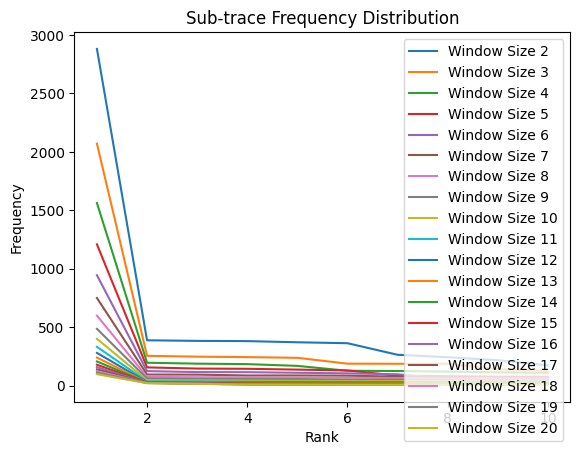

In [141]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to test different window sizes
def test_window_sizes(trace_list, max_n=20):
    for window_size in range(2, max_n + 1):
        all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
        sub_trace_counts = Counter(all_sub_traces)
        
        # Get top 10 frequent sub-traces
        top_counts = sorted(sub_trace_counts.values(), reverse=True)[:10]
        
        plt.plot(range(1, len(top_counts) + 1), top_counts, label=f'Window Size {window_size}')

    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Sub-trace Frequency Distribution')
    plt.legend()
    plt.show()

test_window_sizes(trace_list)


In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert full traces into "sentences" (for NLP processing)
trace_sentences = [' '.join(trace) for trace in trace_list]

# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(trace_sentences)

# Cluster Traces Using K-Means
num_clusters = 5  # Change based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
trace_clusters = kmeans.fit_predict(X)

# Add cluster labels to traces
clustered_traces = pd.DataFrame({'Trace': trace_sentences, 'Cluster': trace_clusters})
print(clustered_traces.sort_values(by='Cluster'))


                                                 Trace  Cluster
0    Triage_&_Medication Outlier Outlier Medical_Re...        0
45   Medical_Records Medical_Records Remicade_&_Fol...        0
44   Triage_&_Medication Outlier Medical_Records Tr...        0
42   Triage_&_Medication Medical_Records Medical_Re...        0
58   Triage_&_Medication Triage_&_Medication Triage...        0
..                                                 ...      ...
23   Triage_&_Medication Medical_Records Prophylaxi...        3
64   Triage_&_Medication Medical_Records Triage_&_M...        3
11   Triage_&_Medication Medical_Records Triage_&_M...        4
43   Outlier Remicade_&_Follow-up Pancreatitis_&_Wh...        4
104  Medical_Records Medical_Records Outlier Rectal...        4

[105 rows x 2 columns]


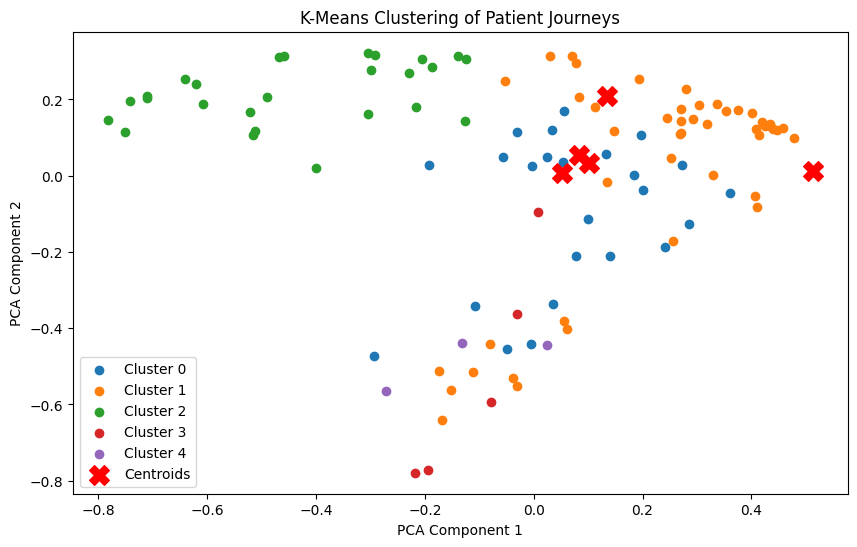

In [143]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert traces to "sentences"
trace_sentences = [' '.join(trace) for trace in trace_list]

# Apply Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(trace_sentences)


# Apply TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(trace_sentences)


# Apply K-Means clustering
num_clusters = 5  # Adjust based on data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Patient Journeys')
plt.legend()
plt.show()

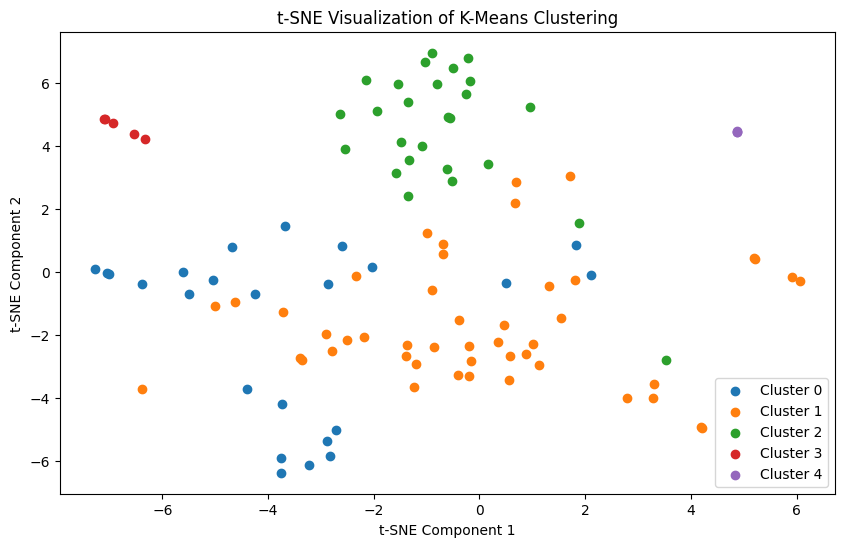

In [144]:
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_tsne[clusters == i, 0], X_tsne[clusters == i, 1], label=f'Cluster {i}')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of K-Means Clustering')
plt.legend()
plt.show()


In [145]:
import plotly.graph_objects as go
import numpy as np

# Ensure clusters is a NumPy array of integers
clusters = np.array(clusters, dtype=int)

# Verify the number of clusters
num_clusters = len(np.unique(clusters))

trace_sentences = np.array(trace_sentences)
# print(trace_sentences)

# Sample patient journey per cluster
sample_traces = {i: trace_sentences[clusters == i][:num_clusters] for i in range(num_clusters)}

# Create Sankey diagram
fig = go.Figure()
for i, (cluster, traces) in enumerate(sample_traces.items()):
    fig.add_trace(go.Sankey(
        node=dict(
            pad=15, thickness=20,
            label=['Start'] + [f'Step {j+1}' for j in range(len(traces[0].split()))]
        ),
        link=dict(
            source=[0] * len(traces),
            target=list(range(1, len(traces[0].split()) + 1)),
            value=[1] * len(traces)
        )
    ))

fig.update_layout(title_text="Sankey Diagram of Clustered Patient Journeys")
fig.show()


In [146]:
import plotly.graph_objects as go
from collections import Counter

# Step 1: Extract Sequences from event columns
event_columns = [col for col in feature_df.columns if 'concept:name' in col]  # Filter for event-related columns
sequences = []

# For each row in feature_df, extract the sequence of events
for _, row in feature_df.iterrows():
    events = [col.split('concept:name_')[1] for col in event_columns if row[col] == 1.0]  # Get events with 1.0 value
    sequences.append('->'.join(events))  # Join events into a sequence

# Step 2: Add sequences to the dataframe (this will be useful for visualization)
feature_df['Sequence'] = sequences

# Step 3: Get the most common sequence per cluster 
cluster_sequences = feature_df.groupby("Cluster")["Sequence"].agg(lambda x: x.mode()[0])

# Step 4: Count the occurrences of each sequence (for Sankey diagram links)
cluster_counts = Counter(cluster_sequences)

# Step 5: Prepare data for Sankey diagram (convert sequences into sources and targets)
sources, targets = [], []

for trace in cluster_sequences.values:
    steps = trace.split("->")  # Split sequence into individual steps
    for i in range(len(steps) - 1):
        sources.append(steps[i])
        targets.append(steps[i + 1])

# Convert sources and targets to indices (for Sankey diagram nodes)
all_nodes = list(set(sources + targets))  # All unique nodes (steps)
source_indices = [all_nodes.index(s) for s in sources]
target_indices = [all_nodes.index(t) for t in targets]

# Step 6: Count the frequency of each link (source -> target pair)
link_counts = Counter(zip(sources, targets))
values = [link_counts[(source, target)] for source, target in zip(sources, targets)]

# Step 7: Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(label=all_nodes),
    link=dict(source=source_indices, target=target_indices, value=values)
))

fig.show()

In [148]:
df = df_verslagen

In [160]:
gib_patients = df[df["new_topic_label"].isin([
    "Rectal_Bleeding_&_Anemia", "GI_Ulcer_&_Bleeding", "Liver_Cirrhosis_&_Varices"
])]["pseudo_id"].unique()

gib_df = df[df["pseudo_id"].isin(gib_patients)].copy()


In [161]:
gib_df = gib_df.sort_values(by=["pseudo_id", "date"])
gib_df.head()


,pseudo_id,date,event_tag,verslagen_report_tags,verslagen_report_start_date,topic_tags,new_topic_label,case:concept:name,concept:name,time:timestamp
35,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:24:00,Triage_Nee__Toediening_Medicatie__Nee_Triage_N...,"Consult, SEH",2013-10-21 10:24:00,['Topic 12'],Triage_&_Medication,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Triage_&_Medication,2013-10-21 10:24:00
34,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:40:00,Outlier,"Consult, SEH",2013-10-21 10:40:00,['Topic -1'],Outlier,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Outlier,2013-10-21 10:40:00
33,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:41:00,Outlier,"Consult, SEH",2013-10-21 10:41:00,['Topic -1'],Outlier,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Outlier,2013-10-21 10:41:00
32,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-21 10:50:00,Medisch_Dossier__Naam_Functie__Dossier_Vk_Sput...,"Consult, SEH",2013-10-21 10:50:00,['Topic 11'],Medical_Records,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Medical_Records,2013-10-21 10:50:00
31,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,2013-10-22 19:59:00,Triage_Nee__Toediening_Medicatie__Nee_Triage_N...,"Consult, SEH",2013-10-22 19:59:00,['Topic 12'],Triage_&_Medication,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Triage_&_Medication,2013-10-22 19:59:00


In [162]:
patient_paths = gib_df.groupby("pseudo_id")["new_topic_label"].apply(list)
patient_paths


pseudo_id
046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6    [Triage_&_Medication, Outlier, Outlier, Medica...
088C9FD98B8B2CBCB597C17C07AC1845B21F0849    [Medical_Records, Triage_&_Medication, Outlier...
0A5645E02FA818D1629926B6BEFA81CF91C25A46    [Rectal_Bleeding_&_Anemia, Patient_ID_&_Medica...
0BC512A65442D0BB4B00FBE05E7EA6283E5C11FD    [Remicade_&_Follow-up, Medical_Records, Triage...
0DD73490997F61870C32B3BB7C9CDE4E801FFF7D    [Outlier, Outlier, Outlier, Remicade_&_Follow-...
                                                                  ...                        
F797097BA39F81B05EEC3F251973743CA03CB9B4    [Triage_&_Medication, Medical_Records, Outlier...
F8C241E69061BB450778B7A4CC336FF520469A0A    [Outlier, Medical_Records, Rectal_Bleeding_&_A...
F8D116F01EE0039678998F393FA337C10AD4F4E2    [Remicade_&_Follow-up, Outlier, Outlier, Outli...
FAA79717FF2C725767E9469350ACECF640E5FCBC    [Triage_&_Medication, Patient_ID_&_Medication,...
FD8C682C1F4FDA1E5EC0B760D30875556419BD71    [Medic

In [164]:
from collections import Counter

common_paths = Counter(tuple(seq[:4]) for seq in patient_paths)
common_paths


Counter({('Triage_&_Medication', 'Medical_Records', 'Outlier', 'Outlier'): 6,
         ('Triage_&_Medication',
          'Medical_Records',
          'Triage_&_Medication',
          'Medical_Records'): 5,
         ('Outlier', 'Outlier', 'Outlier', 'Outlier'): 4,
         ('Rectal_Bleeding_&_Anemia',
          'Patient_ID_&_Medication',
          'Outlier',
          'Outlier'): 3,
         ('Triage_&_Medication',
          'Triage_&_Medication',
          'Medical_Records',
          'Triage_&_Medication'): 3,
         ('Medical_Records', 'Triage_&_Medication', 'Outlier', 'Outlier'): 2,
         ('Outlier',
          'Medical_Records',
          'Triage_&_Medication',
          'Medical_Records'): 2,
         ('Outlier', 'Medical_Records', 'Outlier', 'Outlier'): 2,
         ('Triage_&_Medication',
          'Patient_ID_&_Medication',
          'Outlier',
          'Outlier'): 2,
         ('Triage_&_Medication',
          'Medical_Records',
          'Triage_&_Medication',
          'O

In [165]:
import plotly.graph_objects as go

# Example data for an alluvial plot
# We assume data for 3 stages or categories: A -> B -> C

# Stage 1 (A), Stage 2 (B), Stage 3 (C)
nodes = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']

# Define the flows between nodes
# Flows from A to B, then B to C
sources = [0, 1, 0, 1, 2, 3]
targets = [2, 3, 4, 5, 4, 5]
values = [10, 20, 30, 40, 50, 60]

# Create the alluvial plot
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
    )
))

# Update layout to display the plot
fig.update_layout(title_text="Alluvial Plot Example", font_size=10)
fig.show()
